### Data Exploration for Credit Risk Dataset

In [2]:
#read in credit risk data
import pandas as pd
df_raw=pd.read_csv('creditrisk.csv')
#remove the punctuation
for col in df_raw.columns:
    try:
        df_raw[col]=df_raw[col].apply(lambda x:x.replace("'",''))
    except:
        pass
df_raw.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [3]:
df_raw.describe()
#for numerical variables, all minimum and maximum values seem reasonable

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [4]:
#check the number of counts for each class
df_raw['class'].value_counts()

good    700
bad     300
Name: class, dtype: int64

In [5]:
#check the correlation 
df_raw.corr()
#all features are not highly correlated 

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
duration,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834
credit_amount,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142
installment_commitment,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207
residence_since,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643
age,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201
existing_credits,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667
num_dependents,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000


In [6]:
#extract numerical columns names
dfcolumn=df_raw.columns
dfcolumn_num=df_raw._get_numeric_data().columns

In [7]:
#extract categorical columns names
dfcolumn_cate=list(set(dfcolumn)-set(dfcolumn_num))

In [8]:
#get dummy variables for categorical columns
for col in dfcolumn_cate:
    df_raw=df_raw.join(pd.get_dummies(df_raw[col],prefix=col,prefix_sep='_',drop_first=True))
    df_raw=df_raw.drop(col,axis=1)

In [9]:
#rename the target variable 
df_raw=df_raw.rename(columns={'class_good':'class'})

In [18]:
#definal the model features
X=df_raw.drop('class',axis=1)
Y=df_raw['class']
#check the data size for modeling
df_raw.shape

(1000, 49)

In [19]:
from sklearn.model_selection import train_test_split
def split_scale(X,Y):
    '''split the data into 70% training and 30% testing
    scale the data into range 0-1'''
    #split the data into training and testing data
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1107)
    #scale all data to be 0-1 scale
    from sklearn.preprocessing import MinMaxScaler
    scaler=MinMaxScaler()
    scaler.fit(x_train)
    x_train=scaler.transform(x_train)
    x_test=scaler.transform(x_test)
    return x_train,x_test,y_train,y_test
x_train,x_test,y_train,y_test=split_scale(X,Y)

### SVM

In [23]:
#fit svm on the training data, make prediction on the testing data
#avaluate both training and testing accuracy
from sklearn.svm import SVC
svc=SVC()
from sklearn.metrics import classification_report,accuracy_score
import numpy as np
import matplotlib.pyplot as plt
def fit_svm(x_train,x_test,y_train,y_test):
    #Fit to SVC, using default hyperparameters
    svc.fit(x_train,y_train)
    y_pred=svc.predict(x_test)
    y_train_pred=svc.predict(x_train)
    print('Accuracy on training dataset is ', round(accuracy_score(y_train,y_train_pred),2))
    print('Accuracy on testing dataset is ', round(accuracy_score(y_test,y_pred),2))
fit_svm(x_train,x_test,y_train,y_test)

Accuracy on training dataset is  0.85
Accuracy on testing dataset is  0.77


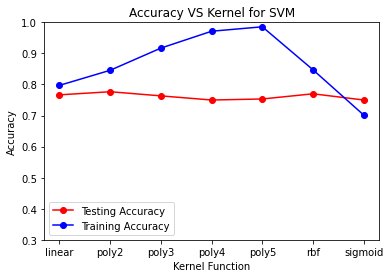

In [24]:
def svm_multiKernel(x_train,x_test,y_train,y_test,filename,ylimleft,ylimright):
    '''evaluate the effects of various kernels on training and testing accuracy'''
    kern=['linear','poly','rbf','sigmoid']
    train_accuracy=[]
    test_accuracy=[]
    for k in kern:
        if k=='poly':
            for i in range(2,6):
                svc= SVC(kernel=k, degree=i)
                svc.fit(x_train, y_train)
                y_pred=svc.predict(x_test)
                y_train_pred=svc.predict(x_train)
                test_accuracy.append(accuracy_score(y_test,y_pred))
                train_accuracy.append(accuracy_score(y_train,y_train_pred))
        else:
            svc= SVC(kernel=k)
            svc.fit(x_train, y_train)
            y_pred=svc.predict(x_test)
            y_train_pred=svc.predict(x_train)
            test_accuracy.append(accuracy_score(y_test,y_pred))
            train_accuracy.append(accuracy_score(y_train,y_train_pred))
    x = ['linear','poly2','poly3','poly4','poly5','rbf','sigmoid']
    plt.plot(x, test_accuracy, 'o-', color='r', label='Testing Accuracy')
    plt.plot(x, train_accuracy, 'o-', color = 'b', label='Training Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Kernel Function')
    plt.title('Accuracy VS Kernel for SVM')
    plt.legend(loc='best')
    plt.ylim(ylimleft,ylimright)
    plt.savefig(filename)
    plt.show()   
svm_multiKernel(x_train,x_test,y_train,y_test,'d1_svc_kernFunc.png',0.3,1)

In [25]:
from sklearn.model_selection import GridSearchCV
def svm_hyper(x_train, y_train):
    '''tune the hyper parameter C and kernel'''
    Cs = [0.05,0.35,0.65,1,1.5]
    kernel_func = ['linear','poly','sigmoid','rbf']
    param_grid = {'C': Cs, 'kernel': kernel_func}
    clf = GridSearchCV(estimator=svc,param_grid=param_grid, cv=5)
    clf.fit(x_train, y_train)
    print("Hyperparameter tuning, best parameters are:")
    print(clf.best_params_)
svm_hyper(x_train, y_train)
#best C and kernel are 1 and rbf, the default values

Hyperparameter tuning, best parameters are:
{'C': 1, 'kernel': 'rbf'}


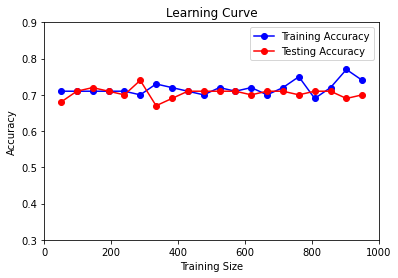

In [26]:
def plot_learning_curve(classifier,axisrange,total,X,Y,filename):
    pct=np.linspace(0.05,0.95,20)
    train_size=[]
    train_accuracy=[]
    test_accuracy=[]
    for i in pct:
        x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=i)
        classifier.fit(x_train,y_train)
        y_pred=classifier.predict(x_test)
        y_train_pred=classifier.predict(x_train)
        train_size.append(total*i)
        train_accuracy.append(round(accuracy_score(y_train,y_train_pred),2))
        test_accuracy.append(round(accuracy_score(y_test,y_pred),2))
    plt.plot(train_size, train_accuracy, 'o-', color="b", label="Training Accuracy")
    plt.plot(train_size, test_accuracy, 'o-', color="r", label="Testing Accuracy")
    plt.title('Learning Curve')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.legend(loc="best")
    plt.axis(axisrange)
    plt.savefig(filename)
    plt.show()
plot_learning_curve(svc,[0,1000,0.3,0.9],len(Y),X,Y,'d1_svc_lcurve.png')

In [27]:
from sklearn.model_selection import cross_val_score
def svm_cvscore(X,Y,c,kern):
    cv_svc_scores = cross_val_score(SVC(C=c,kernel=kern), X, Y, cv=5)
    print('SVM cross validation score mean:{}'.format(np.mean(cv_svc_scores)))
svm_cvscore(X,Y,1,'rbf')

SVM cross validation score mean:0.708


### KNN

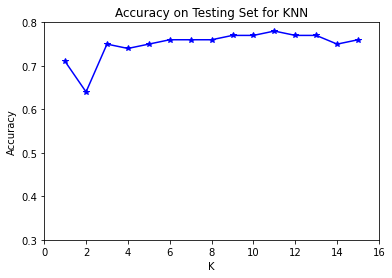

In [28]:
from sklearn.neighbors import KNeighborsClassifier
def knn_fit(x_train,x_test,y_train,y_test,axislim,filename):
    '''check the effects for various K on the testing accuracy'''
    test_accuracy=[]
    for i in range(1,16):
        knn=KNeighborsClassifier(n_neighbors=i)
        knn.fit(x_train,y_train)
        y_pred=knn.predict(x_test)
        y_train_pred=knn.predict(x_train)
        test_accuracy.append(round(accuracy_score(y_test,y_pred),2))
    plt.plot(range(1,16), test_accuracy, '*-', color="b")
    plt.title('Accuracy on Testing Set for KNN')
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    plt.axis(axislim)
    plt.savefig(filename)
    plt.show()
knn_fit(x_train,x_test,y_train,y_test,[0,16,0.3,0.8],'d1_knn_Ktesting.png')

In [29]:
def knn_hyper(x_train, y_train):
    '''tune the hyperparameter:number of neighbors for KNN'''
    knn=KNeighborsClassifier()
    Ks = list(range(1,16))
    param_grid = {'n_neighbors': Ks}
    gsknn = GridSearchCV(estimator=knn,param_grid=param_grid, cv=5)
    gsknn.fit(x_train, y_train)
    print("Hyperparameter tuning, best K for KNN is:")
    print(gsknn.best_params_)
knn_hyper(x_train, y_train)

Hyperparameter tuning, best K for KNN is:
{'n_neighbors': 15}


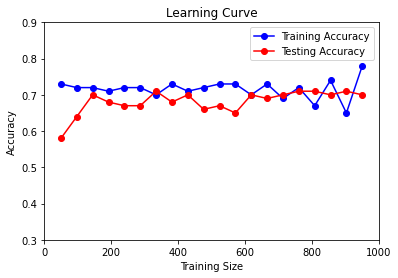

In [30]:
def plot_learning_curve(classifier,axisrange,X,Y,total,filename):
    '''plot the learning curve for KNN'''
    pct=np.linspace(0.05,0.95,20)
    train_size=[]
    train_accuracy=[]
    test_accuracy=[]
    for i in pct:
        x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=i)
        classifier.fit(x_train,y_train)
        y_pred=classifier.predict(x_test)
        y_train_pred=classifier.predict(x_train)
        train_size.append(total*i)
        train_accuracy.append(round(accuracy_score(y_train,y_train_pred),2))
        test_accuracy.append(round(accuracy_score(y_test,y_pred),2))
    plt.plot(train_size, train_accuracy, 'o-', color="b", label="Training Accuracy")
    plt.plot(train_size, test_accuracy, 'o-', color="r", label="Testing Accuracy")
    plt.title('Learning Curve')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.legend(loc="best")
    plt.axis(axisrange)
    plt.savefig(filename)
    plt.show()
plot_learning_curve(KNeighborsClassifier(n_neighbors=15),[0,1000,0.3,0.9],X,Y,len(Y),'d1_knn_lcurve.png')

In [31]:
def knn_cvscore(X,Y,neighbor):
    '''5 folds cv to find the best testing accuracy'''
    knn_cv=KNeighborsClassifier(n_neighbors=neighbor)
    cv_knn_scores = cross_val_score(knn_cv, X, Y, cv=5)
    print('KNN cross validation score mean:{}'.format(np.mean(cv_knn_scores)))
knn_cvscore(X,Y,15)

KNN cross validation score mean:0.6920000000000001


### Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
def dt_fit(x_train,x_test,y_train,y_test):
    '''fit decision tree on the training data, evaluate training accuracy and testing accuracy'''
    dt=DecisionTreeClassifier()
    dt_fit=dt.fit(x_train,y_train)
    y_train_pred=dt.predict(x_train)
    y_pred=dt.predict(x_test)
    print('Accuracy on training dataset is ', round(accuracy_score(y_train,y_train_pred),2))
    print('Accuracy on testing dataset is ', round(accuracy_score(y_test,y_pred),2))
dt_fit(x_train,x_test,y_train,y_test)

Accuracy on training dataset is  1.0
Accuracy on testing dataset is  0.75


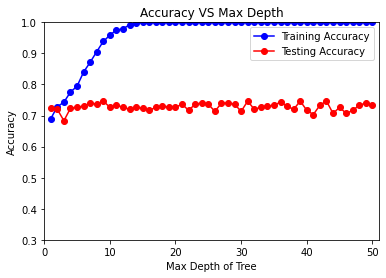

In [33]:
def dt_maxdepth(x_train,x_test,y_train,y_test,filename,axisrange):
    '''check effects of tree depth on the model performance'''
    testing_accuracy=[]
    training_accuracy=[]
    for i in range(1,51):
        dt=DecisionTreeClassifier(max_depth=i)
        dt_fit=dt.fit(x_train,y_train)
        y_train_pred=dt.predict(x_train)
        y_pred=dt.predict(x_test)
        testing_accuracy.append(accuracy_score(y_test,y_pred))
        training_accuracy.append(accuracy_score(y_train,y_train_pred))
    plt.plot(range(1,51), training_accuracy, 'o-', color="b", label="Training Accuracy")
    plt.plot(range(1,51), testing_accuracy, 'o-', color="r", label="Testing Accuracy")
    plt.title('Accuracy VS Max Depth')
    plt.xlabel('Max Depth of Tree')
    plt.ylabel('Accuracy')
    plt.legend(loc="best")
    plt.axis(axisrange)
    plt.savefig(filename)
    plt.show()
dt_maxdepth(x_train,x_test,y_train,y_test,'d1_dt_depthfunc.png',[0,51,0.3,1])

In [34]:
def dt_hyper(x_train, y_train):
    '''tune the hyperparameters for decision tree'''
    param_grid = {'max_depth':list(range(1,16)),'min_samples_split': [2,5,8]}
    gsdt = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param_grid, cv=5)
    gsdt.fit(x_train, y_train)
    print("Hyperparameter tuning, best parameters for decision tree are:")
    print(gsdt.best_params_)
dt_hyper(x_train, y_train)

Hyperparameter tuning, best parameters for decision tree are:
{'max_depth': 2, 'min_samples_split': 2}


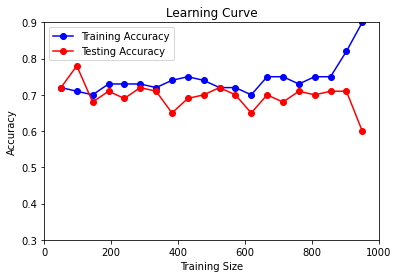

In [35]:
plot_learning_curve(DecisionTreeClassifier(max_depth=2,min_samples_split=2),[0,1000,0.3,0.9],X,Y,len(Y),'d1_dt_lcurve.png')

In [36]:
def dt_cvscore(X, Y,depth,minsample):
    '''5 folds cv for decision tree'''
    dt_cv=DecisionTreeClassifier(max_depth=depth,min_samples_split=minsample)
    cv_dt_scores = cross_val_score(dt_cv, X, Y, cv=5)
    print('Decision Tree cross validation score mean:{}'.format(np.mean(cv_dt_scores)))
dt_cvscore(X, Y,2,2)

Decision Tree cross validation score mean:0.696


### Gradient Boosting

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
def gbc_fit(x_train,x_test,y_train,y_test):
    '''fit gradient boosting on the training data, evaluate training and testing accuracy'''
    gbc=GradientBoostingClassifier()
    gbc.fit(x_train,y_train)
    y_train_pred=gbc.predict(x_train)
    y_pred=gbc.predict(x_test)
    print('Accuracy on training dataset is ', round(accuracy_score(y_train,y_train_pred),2))
    print('Accuracy on testing dataset is ', round(accuracy_score(y_test,y_pred),2))
gbc_fit(x_train,x_test,y_train,y_test)

Accuracy on training dataset is  0.91
Accuracy on testing dataset is  0.79


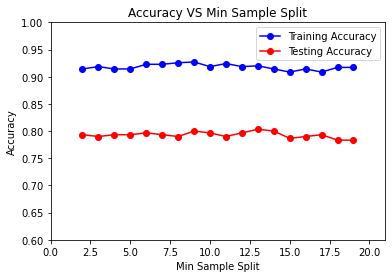

In [38]:
def gbc_minisample(x_train,x_test,y_train,y_test,filename,axisrange):
    '''check the effect of min sample split on model performance'''
    testing_accuracy=[]
    training_accuracy=[]
    for i in range(2,20):
        gbc=GradientBoostingClassifier(min_samples_split=i)
        gbc.fit(x_train,y_train)
        y_train_pred=gbc.predict(x_train)
        y_pred=gbc.predict(x_test)
        testing_accuracy.append(accuracy_score(y_test,y_pred))
        training_accuracy.append(accuracy_score(y_train,y_train_pred))
    plt.plot(range(2,20), training_accuracy, 'o-', color="b", label="Training Accuracy")
    plt.plot(range(2,20), testing_accuracy, 'o-', color="r", label="Testing Accuracy")
    plt.title('Accuracy VS Min Sample Split')
    plt.xlabel('Min Sample Split')
    plt.ylabel('Accuracy')
    plt.legend(loc="best")
    plt.axis(axisrange)
    plt.savefig(filename)
    plt.show()
gbc_minisample(x_train,x_test,y_train,y_test,'d1_gbc_minsample.png',[0,21,0.6,1])

In [21]:
def gbc_hyper(x_train, y_train):
    '''tune the hyperparameter for gradient boosting'''
    param_grid = {'min_samples_split': [2,8,15],'n_estimators':[30,70,100],'max_depth':[5,12,20]}
    gsgbc = GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=param_grid, cv=5)
    gsgbc.fit(x_train, y_train)
    print("Hyperparameter tuning, best parameter for gradient boosting is:")
    print(gsgbc.best_params_)
gbc_hyper(x_train, y_train)

Hyperparameter tuning, best parameter for gradient boosting is:
{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}


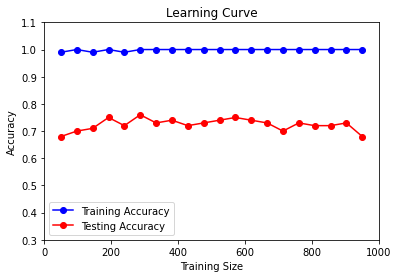

In [39]:
plot_learning_curve(GradientBoostingClassifier(min_samples_split=2,n_estimators=100,max_depth=5),[0,1000,0.3,1.1],X,Y,len(Y),'d1_gbc_lcurve.png')

In [40]:
def gbc_cvscore(X, Y, minsample,numtree,depth):
    '''5 foldes CV for Gradient boosting'''
    gbc_cv=GradientBoostingClassifier(min_samples_split=minsample,n_estimators=numtree,max_depth=depth)
    cv_gbc_scores = cross_val_score(gbc_cv, X, Y, cv=5)
    print('GBC cross validation score mean:{}'.format(np.mean(cv_gbc_scores)))
gbc_cvscore(X, Y, 2,100,5)

GBC cross validation score mean:0.743


### Neural Network

In [57]:
import warnings
warnings.filterwarnings("ignore")

In [165]:
from sklearn.neural_network import MLPClassifier
def nnc_fit(x_train,x_test,y_train,y_test):
    '''fit ann on training dataset, evaluate training and testing accuracy'''
    nnc=MLPClassifier(activation='logistic')
    nnc.fit(x_train,y_train)
    y_train_pred=nnc.predict(x_train)
    y_pred=nnc.predict(x_test)
    print('Accuracy on training dataset is ', round(accuracy_score(y_train,y_train_pred),2))
    print('Accuracy on testing dataset is ', round(accuracy_score(y_test,y_pred),2))
nnc_fit(x_train,x_test,y_train,y_test)

Accuracy on training dataset is  0.78
Accuracy on testing dataset is  0.75


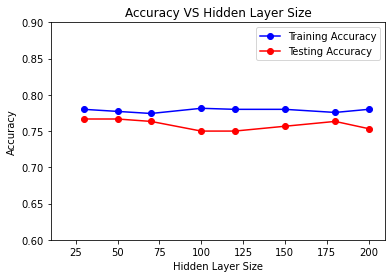

In [166]:
def nnc_layersize(x_train,x_test,y_train,y_test,axislim,filename):
    testing_accuracy=[]
    training_accuracy=[]
    for i in [30,50,70,100,120,150,180,200]:
        nlp=MLPClassifier(hidden_layer_sizes=i,activation='logistic')
        nlp.fit(x_train,y_train)
        y_train_pred=nlp.predict(x_train)
        y_pred=nlp.predict(x_test)
        testing_accuracy.append(accuracy_score(y_test,y_pred))
        training_accuracy.append(accuracy_score(y_train,y_train_pred))
    plt.plot([30,50,70,100,120,150,180,200], training_accuracy, 'o-', color="b", label="Training Accuracy")
    plt.plot([30,50,70,100,120,150,180,200], testing_accuracy, 'o-', color="r", label="Testing Accuracy")
    plt.title('Accuracy VS Hidden Layer Size')
    plt.xlabel('Hidden Layer Size')
    plt.ylabel('Accuracy')
    plt.legend(loc="best")
    plt.axis(axislim)
    plt.savefig(filename)
    plt.show()
nnc_layersize(x_train,x_test,y_train,y_test,[10,210,0.6,0.9],'d1_ann_layersize.png')

In [173]:
def nnc_hyper(x_train, y_train):
    '''tune the hyperparameters for ANN'''
    param_grid = {'hidden_layer_sizes': [50,100,150],'learning_rate_init':[0.01, 0.05, .1]}
    gsmlp = GridSearchCV(estimator=MLPClassifier(activation='logistic'),param_grid=param_grid, cv=5)
    gsmlp.fit(x_train, y_train)
    print("Hyperparameter tuning, best parameters for neural network are:")
    print(gsmlp.best_params_)
nnc_hyper(x_train, y_train)

Hyperparameter tuning, best parameters for neural network are:
{'hidden_layer_sizes': 50, 'learning_rate_init': 0.01}


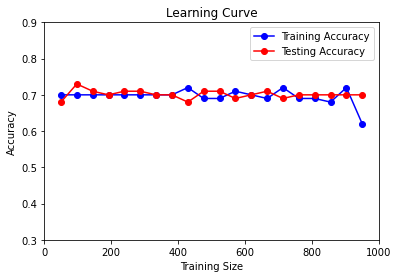

In [174]:
plot_learning_curve(MLPClassifier(activation='logistic',hidden_layer_sizes=50,learning_rate_init=0.01),[0,1000,0.3,0.9],X,Y,len(Y),'d1_ann_lcurve.png')

In [175]:
def nnc_cvscore(X, Y,act,layer,rate):
    '''5 foldes CV for ann'''
    mlp_cv=MLPClassifier(activation=act,hidden_layer_sizes=layer,learning_rate_init=rate)
    cv_mlp_scores = cross_val_score(mlp_cv, X, Y, cv=5)
    print('MLP 5 Foldes cross validation score mean:{}'.format(np.mean(cv_mlp_scores)))
nnc_cvscore(X, Y,'logistic',50,0.01)

MLP 5 Foldes cross validation score mean:0.7


### Comparison of the five models for credit risk dataset

In [43]:
def five_compare(X,Y,kern,Cvalue,neighbor,depth,minsample,gbcminsample,gbcdepth,gbctree,act,layer,rate):
    pct=np.linspace(0.05,0.95,20)
    train_size=[]
    accuracy={'SVM':[],'KNN':[],'Decision Tree':[],'Gradient Boosting':[], 'Neural Network':[]}
    names=['SVM','KNN','Decision Tree','Gradient Boosting', 'Neural Network']
    models=[SVC(C=Cvalue,kernel=kern),KNeighborsClassifier(n_neighbors=neighbor),DecisionTreeClassifier(max_depth=depth,min_samples_split=minsample),
            GradientBoostingClassifier(min_samples_split=gbcminsample,n_estimators=gbctree,max_depth=gbcdepth),
            MLPClassifier(activation=act,hidden_layer_sizes=layer,learning_rate_init=rate)]
    for i in pct:
        x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=i)
        for j in range(0,5):
            cv_scores = cross_val_score(models[j], x_train,y_train, cv=5)
            accuracy[names[j]].append(np.mean(cv_scores))
    return accuracy
accuracy=five_compare(X,Y,'rbf',1,15,2,2,2,5,100,'logistic',50,0.01)

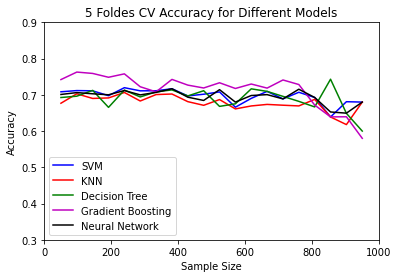

In [44]:
def fivecompare_plot(accuracy,axislim,total,filename):
    pct=np.linspace(0.05,0.95,20)
    plt.plot(total*pct,accuracy['SVM'], color="b", label="SVM")
    plt.plot(total*pct,accuracy['KNN'], color="r", label="KNN")
    plt.plot(total*pct,accuracy['Decision Tree'], color="g", label="Decision Tree")
    plt.plot(total*pct,accuracy['Gradient Boosting'], color="m", label="Gradient Boosting")
    plt.plot(total*pct,accuracy['Neural Network'], color="k", label="Neural Network")
    plt.title('5 Foldes CV Accuracy for Different Models')
    plt.xlabel('Sample Size')
    plt.ylabel('Accuracy')
    plt.legend(loc="best")
    plt.axis(axislim)
    plt.savefig(filename)
    plt.show()
fivecompare_plot(accuracy,[0,1000,0.3,0.9],len(Y),'d1_fivecompare.png')

In [45]:
from sklearn.model_selection import cross_validate
def five_comptime(X,Y,kern,Cvalue,neighbor,depth,minsample,gbcminsample,gbcdepth,gbctree,act,layer,rate):
    pct=np.linspace(0.05,0.95,20)
    train_size=[]
    traintime={'SVM':[],'KNN':[],'Decision Tree':[],'Gradient Boosting':[], 'Neural Network':[]}
    testtime={'SVM':[],'KNN':[],'Decision Tree':[],'Gradient Boosting':[], 'Neural Network':[]}
    names=['SVM','KNN','Decision Tree','Gradient Boosting', 'Neural Network']
    models=[SVC(C=Cvalue,kernel=kern),KNeighborsClassifier(n_neighbors=neighbor),DecisionTreeClassifier(max_depth=depth,min_samples_split=minsample),
            GradientBoostingClassifier(min_samples_split=gbcminsample),
            MLPClassifier(activation=act,hidden_layer_sizes=layer,learning_rate_init=rate)]
    for i in pct:
        x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=i)
        for j in range(0,5):
            scores = cross_validate(models[j],X,Y,cv=5,scoring='accuracy',n_jobs=-1,return_train_score=True)
            traintime[names[j]].append(np.mean(scores['fit_time']))
            testtime[names[j]].append(np.mean(scores['score_time']))
    return traintime,testtime    
traintime,testtime=five_comptime(X,Y,'rbf',1,15,2,2,2,5,100,'logistic',50,0.01)

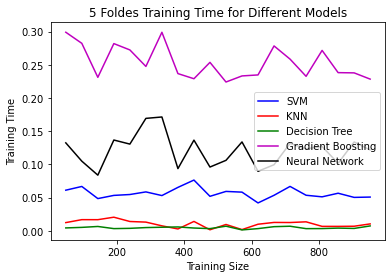

In [46]:
def fivecomptraintime_plot(time,axislim,total,filename,title,ylabel):
    pct=np.linspace(0.05,0.95,20)
    plt.plot(total*pct,time['SVM'], color="b", label="SVM")
    plt.plot(total*pct,time['KNN'], color="r", label="KNN")
    plt.plot(total*pct,time['Decision Tree'], color="g", label="Decision Tree")
    plt.plot(total*pct,time['Gradient Boosting'], color="m", label="Gradient Boosting")
    plt.plot(total*pct,time['Neural Network'], color="k", label="Neural Network")
    plt.title(title)
    plt.xlabel('Training Size')
    plt.ylabel(ylabel)
    plt.legend(loc='best')
#    plt.axis(axislim)
    plt.savefig(filename)
    plt.show()
fivecomptraintime_plot(traintime,[0,1000,0.3,0.9],len(Y),'d1_fivecomparetraintime.png','5 Foldes Training Time for Different Models','Training Time')

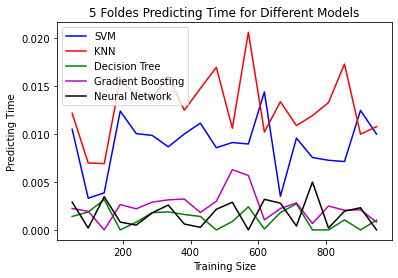

In [47]:
fivecomptraintime_plot(testtime,[0,1000,0.3,0.9],len(Y),'d1_fivecomparepredtime.png','5 Foldes Predicting Time for Different Models','Predicting Time')

### Phishing 

In [49]:
#read in the phishing data
df3_raw=pd.read_csv('phishing.csv')

In [50]:
#define the model features
X=df3_raw.drop('Result',axis=1)
Y=df3_raw['Result']
#check the data size
df3_raw.shape

(11055, 31)

In [52]:
#split the phishing data into 70% training and 30% testing
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1107)

### SVM

In [187]:
#fit svm on the phishing data,evaluate the training and testing accuracy
fit_svm(x_train,x_test,y_train,y_test)

Accuracy on training dataset is  0.95
Accuracy on testing dataset is  0.95


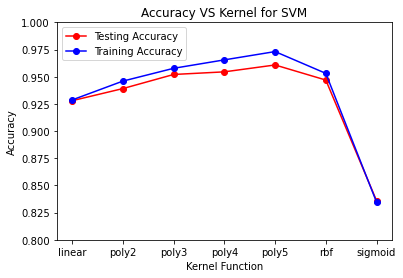

In [188]:
#check the effects of various kernels on svm model performance
svm_multiKernel(x_train,x_test,y_train,y_test,'d2_svm_kernfun.png',0.8,1)

In [189]:
#tune hyper parameters for svm on phishing data
svm_hyper(x_train, y_train)

Hyperparameter tuning, best parameters are:
{'C': 1.5, 'kernel': 'poly'}


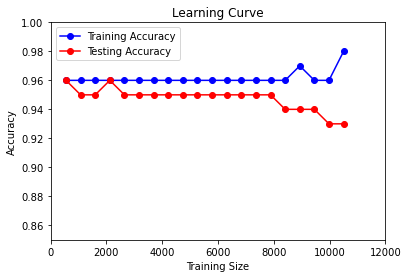

In [190]:
plot_learning_curve(SVC(C=1.5,kernel='poly'),[0,12000,0.85,1],X,Y,len(Y),'d_svm_lcurve.png')

In [191]:
#5 folds cv for svm on phishing data
svm_cvscore(X,Y,1.5,'poly')

SVM cross validation score mean:0.9516056083220261


### KNN

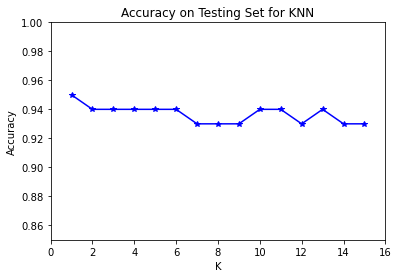

In [192]:
#check the effects of K on testing accuracy for KNN of phishing data
knn_fit(x_train,x_test,y_train,y_test,[0,16,0.85,1],'d2_knn_Kfunc.png')

In [193]:
#tune hyper parameters for KNN of phishing data
knn_hyper(x_train, y_train)

Hyperparameter tuning, best K for KNN is:
{'n_neighbors': 1}


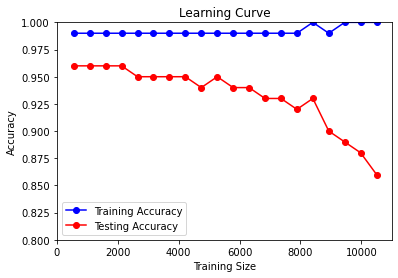

In [194]:
#learning curve for KNN on phishing data
plot_learning_curve(KNeighborsClassifier(n_neighbors=1),
[0,11000,0.8,1],X,Y,len(Y),'d2_knn_lcurve.png')

In [195]:
#5 folds cv score of KNN on phishing data
knn_cvscore(X,Y,1)

KNN cross validation score mean:0.9489823609226594


### Decision Tree

In [196]:
#decision tree fit on phishing training data, evaluate training and testing accuracy
dt_fit(x_train,x_test,y_train,y_test)

Accuracy on training dataset is  0.99
Accuracy on testing dataset is  0.96


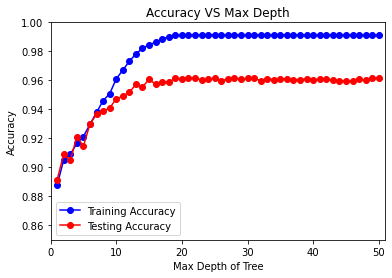

In [197]:
#check effect of tree depth on training and testing accuracy
dt_maxdepth(x_train,x_test,y_train,y_test,'d2_dt_depthfunc.png',[0,51,0.85,1])

In [198]:
#hyper parameter tunning for decision tree on phishing data
dt_hyper(x_train, y_train)

Hyperparameter tuning, best parameters for decision tree are:
{'max_depth': 15, 'min_samples_split': 2}


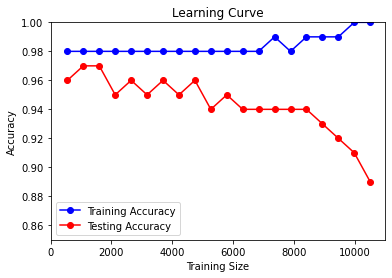

In [199]:
#learning curve for decision tree on phishing data
plot_learning_curve(DecisionTreeClassifier(max_depth=14,min_samples_split=2),[0,11000,0.85,1],X,Y,len(Y),'d2_dt_lcurve.png')

In [200]:
#5 folds cv for decision tree on phshing data
dt_cvscore(X, Y,14,2)

Decision Tree cross validation score mean:0.9469923111714156


### Gradient Boosting

In [201]:
#gradient boosting fit on training data, evaluate training and testing accuracy
gbc_fit(x_train,x_test,y_train,y_test)

Accuracy on training dataset is  0.95
Accuracy on testing dataset is  0.95


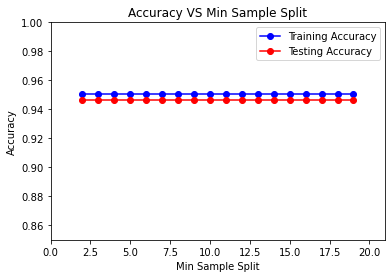

In [202]:
#check the effect of min sample split on training and testing accuracy
gbc_minisample(x_train,x_test,y_train,y_test,'d2_gbc_minsamplefunc.png',[0,21,0.85,1])

In [53]:
#hyper parameter tuning for gradient boosting
gbc_hyper(x_train, y_train)

Hyperparameter tuning, best parameter for gradient boosting is:
{'max_depth': 20, 'min_samples_split': 15, 'n_estimators': 70}


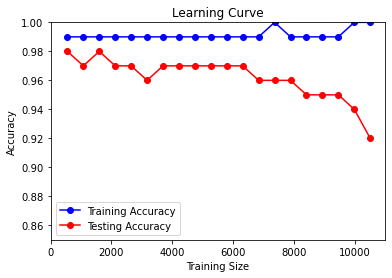

In [54]:
#learning curve for gradient boosting
plot_learning_curve(GradientBoostingClassifier(min_samples_split=15,n_estimators=70,max_depth=20),[0,11000,0.85,1],X,Y,len(Y),'d2_gbc_lcurve.png')

In [55]:
#5 folds cv for gradient boosting on phishing data
gbc_cvscore(X, Y, 15,70,20)

GBC cross validation score mean:0.966078697421981


### Neural Network

In [206]:
#fit ann on training data, evaluate training and testing accuracy
nnc_fit(x_train,x_test,y_train,y_test)

Accuracy on training dataset is  0.95
Accuracy on testing dataset is  0.94


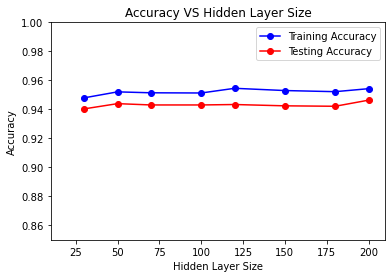

In [207]:
#check the effect of different layer size on testing and training accuracy
nnc_layersize(x_train,x_test,y_train,y_test,[10,210,0.85,1],'d2_ann_layerfunc.png')

In [208]:
#hyper parameter tunning for ann
nnc_hyper(x_train, y_train)

Hyperparameter tuning, best parameters for neural network are:
{'hidden_layer_sizes': 100, 'learning_rate_init': 0.05}


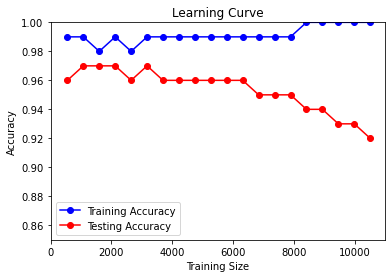

In [212]:
#learning curve for ann on phishing data
plot_learning_curve(MLPClassifier(activation='logistic',hidden_layer_sizes=100,learning_rate_init=0.05),[0,11000,0.85,1],X,Y,len(Y),'d2_ann_lcurve.png')

In [213]:
#5 folds cv for ann 
nnc_cvscore(X, Y,'logistic',100,0.05)

MLP 5 Foldes cross validation score mean:0.9629127091813657


### Compare Five Models for Phishing Website Data

In [63]:
accuracy=five_compare(X,Y,'poly',1.5,1,15,2,15,20,70,'logistic',100,0.05)

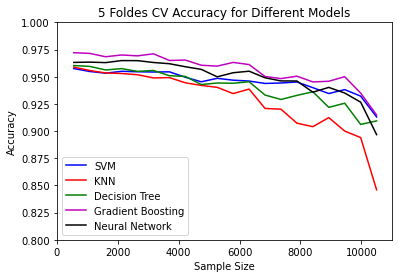

In [65]:
fivecompare_plot(accuracy,[0,11000,0.8,1],len(Y),'d2_fivecompare.png')

In [66]:
traintime,testtime=five_comptime(X,Y,'poly',1.5,1,15,2,15,20,70,'logistic',100,0.05)

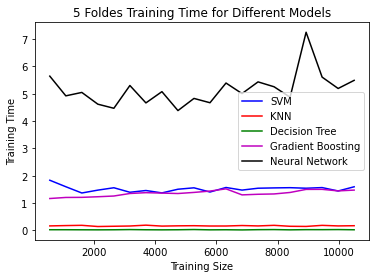

In [67]:
fivecomptraintime_plot(traintime,[0,1000,0.3,0.9],len(Y),'d2_fivecomparetraintime.png','5 Foldes Training Time for Different Models','Training Time')

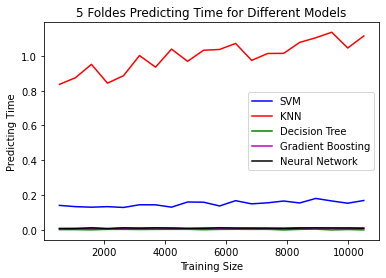

In [68]:
fivecomptraintime_plot(testtime,[0,1000,0.3,0.9],len(Y),'d2_fivecomparepredtime.png','5 Foldes Predicting Time for Different Models','Predicting Time')